In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

c:\users\akhireld\documents\projects\football-data-analysis\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load training dataset
df = pd.read_csv('result.csv')

df.head(5)

,Unnamed: 0,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,capacity
0,0,1729,1729,2008,1,2008-08-17,489042,10260,10261,1,...,Normal,Organised,45,Medium,65,Press,45,Normal,Cover,75811
1,1,1729,1729,2008,1,2008-08-16,489043,9825,8659,1,...,Normal,Organised,70,High,70,Double,70,Wide,Cover,60361
2,2,1729,1729,2008,1,2008-08-16,489044,8472,8650,0,...,Lots,Organised,40,Medium,60,Press,40,Normal,Cover,48707
3,3,1729,1729,2008,1,2008-08-16,489045,8654,8528,2,...,Normal,Organised,35,Medium,70,Double,35,Normal,Cover,35303
4,4,1729,1729,2008,1,2008-08-16,489047,8668,8655,2,...,Normal,Organised,45,Medium,70,Double,45,Normal,Cover,40157


In [3]:
# pre process data
# 1. One hot encoding
df = pd.get_dummies(df)

df.head(5)

,Unnamed: 0,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_Deep,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Narrow,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Cover
0,0,1729,1729,2008,1,489042,10260,10261,1,1,...,1,0,0,1,0,1,0,1,0,1
1,1,1729,1729,2008,1,489043,9825,8659,1,0,...,1,0,1,0,1,0,0,0,1,1
2,2,1729,1729,2008,1,489044,8472,8650,0,1,...,1,0,0,1,0,1,0,1,0,1
3,3,1729,1729,2008,1,489045,8654,8528,2,1,...,1,0,0,1,1,0,0,1,0,1
4,4,1729,1729,2008,1,489047,8668,8655,2,3,...,1,0,0,1,1,0,0,1,0,1


In [4]:
# split into training and testing dataset

feature_names = df.columns[1:].tolist()
feature_names.remove('match_result')

# Removing player ids
for col in [f'home_player_{i}' for i in range(1, 12)]:
    feature_names.remove(col)
for col in [f'away_player_{i}' for i in range(1, 12)]:
    feature_names.remove(col)

X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['match_result'], test_size=0.2, random_state=123456)

In [6]:
# Create a random forest classifier 
cls = AdaBoostClassifier(n_estimators=100, random_state=123456)
cls.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=123456)

In [8]:
# predict and get metrics
predicted = cls.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.796


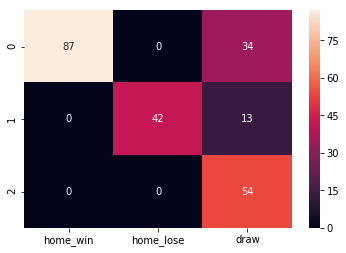

In [10]:
# Generate confusion matrix
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['home_win', 'home_lose', 'draw'])
sns.heatmap(cm, annot=True)


In [11]:
# Calculate f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted, average='micro')  

print(f'f1 score: {f1}')

f1 score: 0.7956521739130434
